In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from missingno import matrix
import missingno as msno

In [11]:
original = sns.load_dataset('penguins')

original.dropna(thers=5, inplace=True)

TypeError: DataFrame.dropna() got an unexpected keyword argument 'thers'

In [4]:
df = pd.read_parquet('missing.parquet')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,NaN,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,NaN,13.7,214.0,4925.0,Female
338,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
339,Gentoo,Biscoe,50.4,15.7,222.0,NaN,Male
340,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1600x600 with 0 Axes>

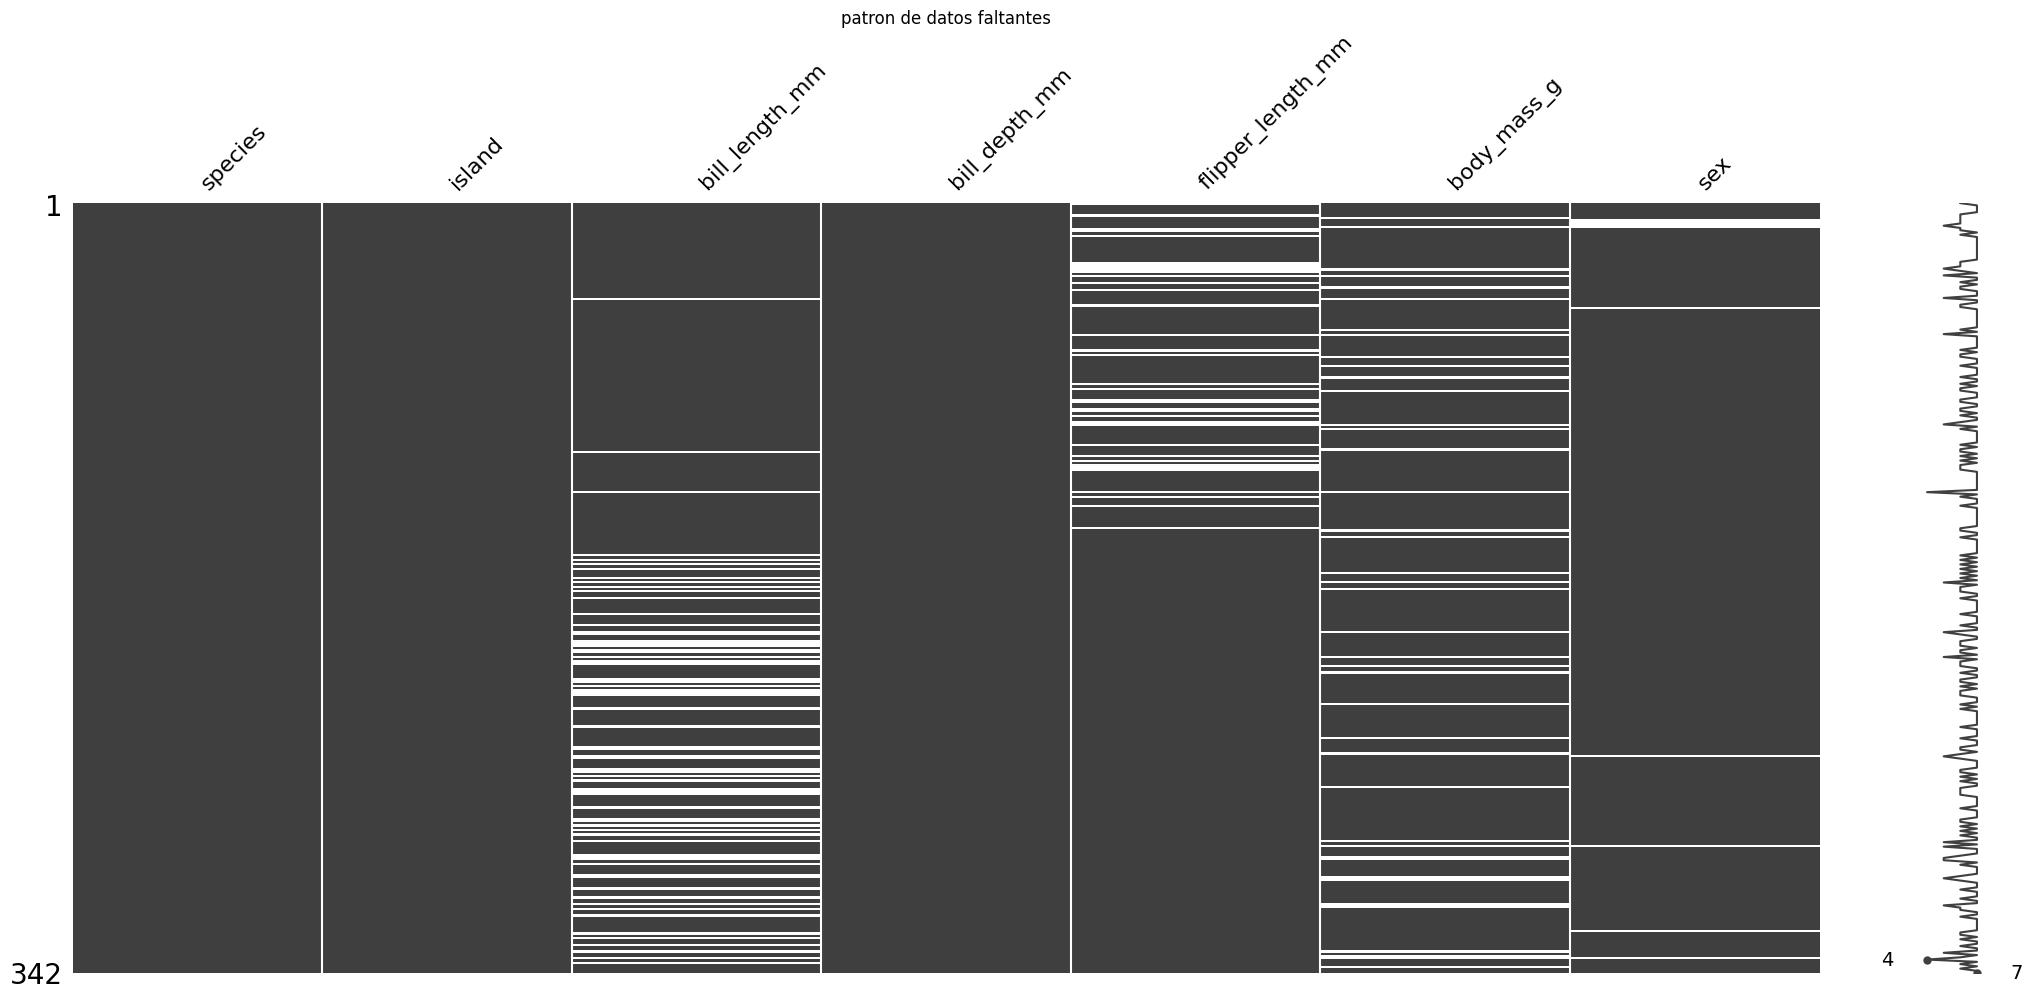

In [6]:
plt.figure(figsize=(16,6))
msno.matrix(df)
plt.title('patron de datos faltantes')
plt.show

<Figure size 1600x600 with 0 Axes>

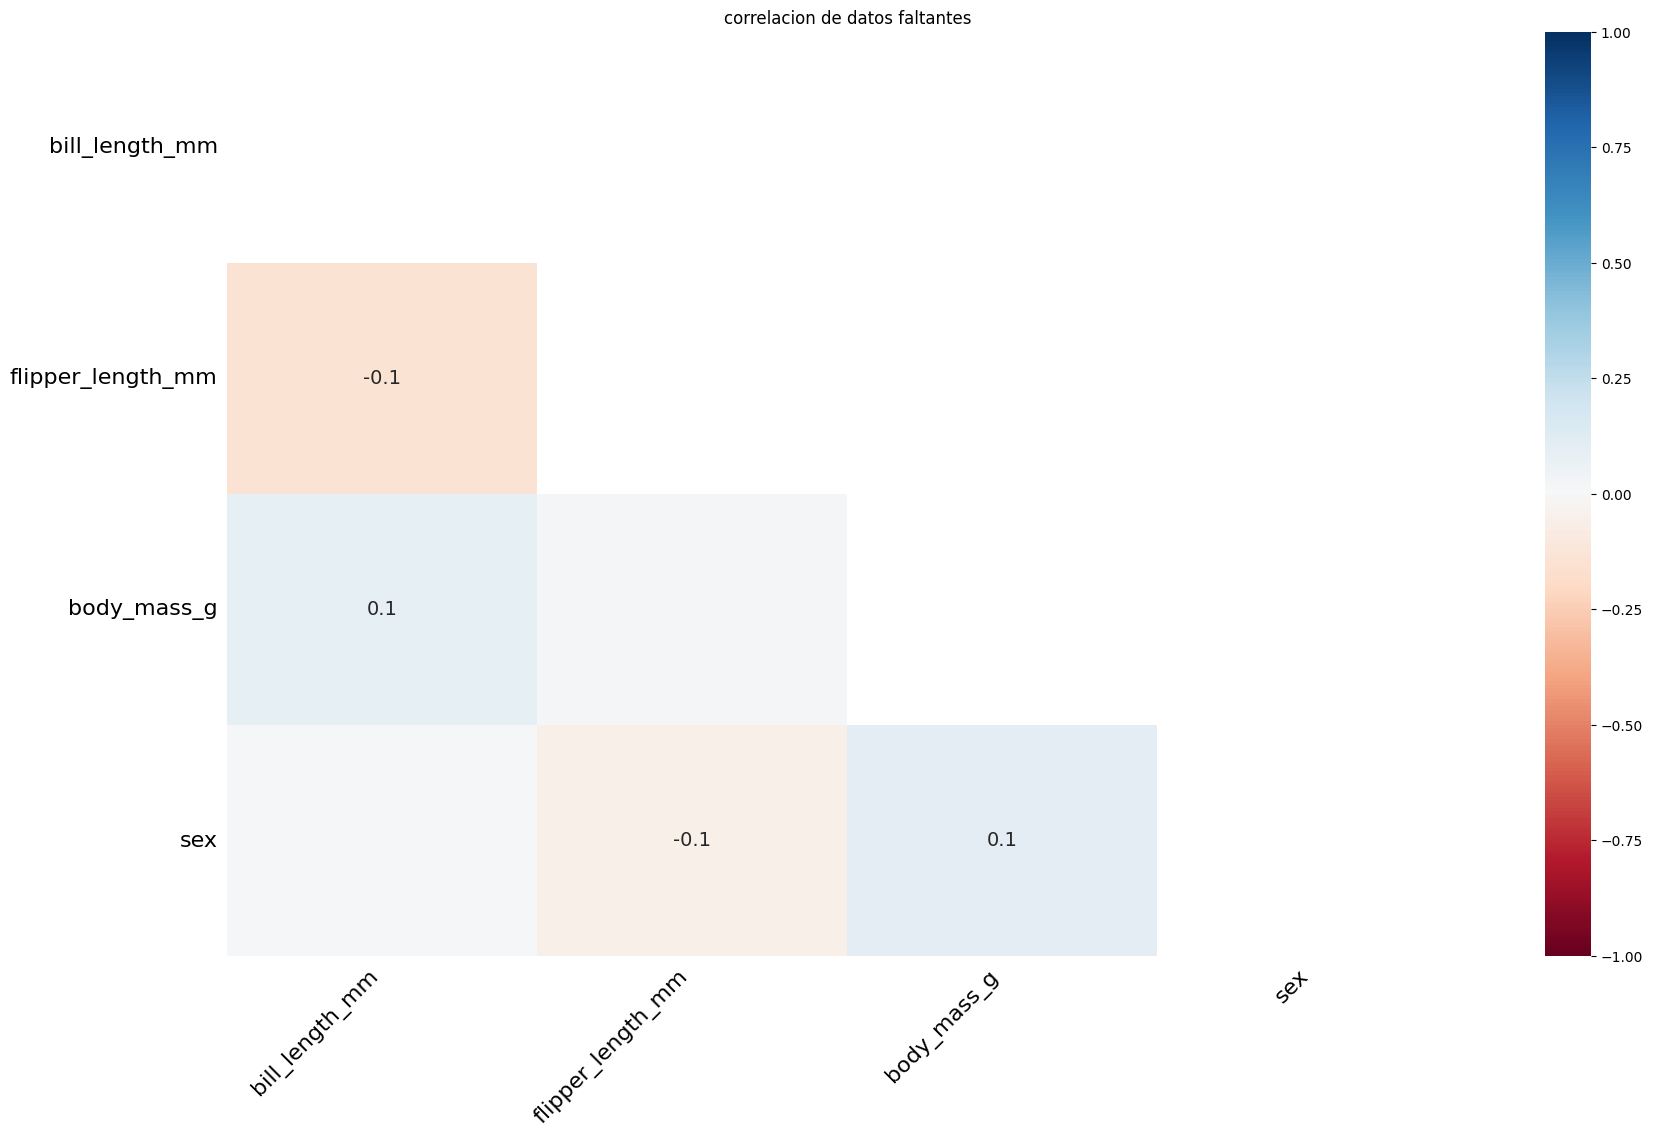

In [8]:
plt.figure(figsize=(16,6))
msno.heatmap(df)
plt.title('correlacion de datos faltantes')
plt.show();

### columna body_mass_g

In [14]:
print('analisis de body_mass_g')
print('Media con datos con missing', original['body_mass_g'].mean())
print('media con datos faltantes',
        df['body_mass_g'].dropna().mean())


analisis de body_mass_g
Media con datos con missing 4201.754385964912
media con datos faltantes 4179.568106312292


### columna flipper lenght mm mar porcentaje de nulos por especie con esta 

In [21]:
print(df.groupby('species')['flipper_length_mm'].apply(lambda x: x.isna().mean()*100))

species
Adelie       23.84106
Chinstrap     0.00000
Gentoo        0.00000
Name: flipper_length_mm, dtype: float64


### columna 'bill_lenght_mm mar

In [23]:
print(original['bill_lenght_mm'].mean())
print('Media de bill_lenght_mm con datos faltantes',
      df['bill_lenght_mm'].mean())

KeyError: 'bill_lenght_mm'

tratamiento

In [ ]:
# tratamiento mcar
# podemos usar inputacion simple
body_mass_imputed = df['body_mass_g'].fillna(
    df['body_mass_g'].mean())

#tratamiento mar 
# imputaciones en grupos 
flipper_imputed= df.groupby('species')['flipper_lenght_mm'].transform(
    lambda x: x.fillna(x.mean()))

# tratamiento mnar
# aqui metoso mas sofisticados
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
bill_lengt.imputed

